<br>
<br>
<div align="center">
<font size="8">
<span style="color:Blue">Machine Learning Lab</span>
</font>
</div>

---

<font size="5">
<div align='center'>Name : Aman Kumar Gupta</div>
    <br>
<div align='center'>Roll No.: BTech/25013/18</div>
    <br>
<div align='center'>Branch : CSE</div>
    <br>
<div align='center'>Semester : 6</div>
    <br>
</font>

---

# Artificial Neural Network

**Aim :** Build an Artificial Neural Network by implementing the Back propagation algorithm and test the same using appropriate data sets.

### Algorithms
```
1. Assign random weights to all the linkages to start the algorithm.
2. Using the inputs and the linkages find the activation rate of Hidden Nodes
3. Using the activation rate of Hidden nodes and linkages to output, find the activation rate of Output nodes.
4. Find the error rate at the output node and recalibrate all the linkages between hidden nodes and output nodes.
5. Using the weights and error found at output node, cascade down the error to hidden nodes.
6. Recalibrate the weights between hidden node and the input nodes.
7. Repeat the process till the convergence criterion is met.
8. Using the final linkage weights score the activation rate of the output nodes.
```

### 1. Import Package

In [31]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

### 2. read data

In [23]:
df = pd.read_csv('data/hour_ride.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### 3. Make dummy variable

In [24]:
dummy_variables = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
df = pd.get_dummies(df,columns=dummy_variables)
variables_to_drop = ['instant', 'dteday',  'atemp', 'workingday','casual', 'registered']
df.drop(variables_to_drop,axis = 1,inplace=True)

df.head()

,yr,holiday,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,16,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,32,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,13,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 57 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            17379 non-null  int64  
 1   holiday       17379 non-null  int64  
 2   temp          17379 non-null  float64
 3   hum           17379 non-null  float64
 4   windspeed     17379 non-null  float64
 5   cnt           17379 non-null  int64  
 6   season_1      17379 non-null  uint8  
 7   season_2      17379 non-null  uint8  
 8   season_3      17379 non-null  uint8  
 9   season_4      17379 non-null  uint8  
 10  weathersit_1  17379 non-null  uint8  
 11  weathersit_2  17379 non-null  uint8  
 12  weathersit_3  17379 non-null  uint8  
 13  weathersit_4  17379 non-null  uint8  
 14  mnth_1        17379 non-null  uint8  
 15  mnth_2        17379 non-null  uint8  
 16  mnth_3        17379 non-null  uint8  
 17  mnth_4        17379 non-null  uint8  
 18  mnth_5        17379 non-nu

### 4. Split Data

In [29]:
target_fields = ['cnt' ]
X = df.drop(target_fields,axis=1)
Y = df[target_fields]
x_train,x_test,y_train,y_test = train_test_split(X,Y)

### 5. Set Hyperparameter and train Network

In [38]:
#Hyperparameter
learning_rate  = 0.1 
max_iter = 100
hidden_layer_sizes = (200,100,50)
batch_size = 50

In [39]:
reg = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes,
                   learning_rate_init=learning_rate,
                   max_iter=max_iter, 
                   batch_size=batch_size)
reg.fit(x_train,y_train)


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPRegressor(batch_size=50, hidden_layer_sizes=(200, 100, 50),
             learning_rate_init=0.1, max_iter=100)

### 6. Check Score

In [40]:
print(f'R^2 Score of Network : {reg.score(x_test,y_test)} .')

R^2 Score of Network : 0.9188769221513343 .


---

## EM algorithm and KMeans Clustering

**Aim :** Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data set for clustering using k-Means algorithm. Compare the results of these two algorithms and comment on the quality of clustering. You can add Java/Python ML library classes/API in the program.

---

### EM algorithm:
```

1. Given a set of incomplete data, consider a set of starting parameters.
2. Expectation step (E – step): Using the observed available data of the dataset, estimate (guess) the values of the missing data.
3. Maximization step (M – step): Complete data generated after the expectation (E) step is used in order to update the parameters.
4. Repeat step 2 and step 3 until convergence.

```

### K Means algorithm:

```
Initialize k means with random values

For a given number of iterations:
    Iterate through items:
        Find the mean closest to the item
        Assign item to mean
        Update mean
```

### 1. Import package and read Data

In [8]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [9]:
df = pd.read_csv("data/Mall_Customers.csv")

In [10]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### 2. Train a EM model

In [12]:
mod = GaussianMixture(n_components=3)
mod.fit(X)

GaussianMixture(n_components=3)

### 3. Train a KMeans Model

In [13]:
kmm = KMeans(n_clusters=3)
kmm.fit(X)

KMeans(n_clusters=3)

### 4. Compairing Both algo

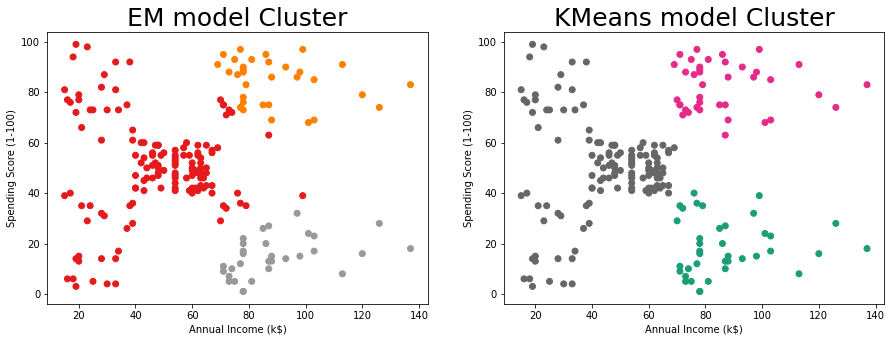

In [40]:
#plot EM models output
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'],  
           c = mod.predict(X), cmap =plt.cm.Set1) 
plt.title("EM model Cluster",fontdict={'fontsize': 25})
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

# plot KMeans model output
plt.subplot(1, 2, 2)
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'],  
           c = kmm.labels_, cmap =plt.cm.Dark2_r) 
plt.title("KMeans model Cluster",fontdict={'fontsize': 25})
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)");

1. As it is evident from the above graphs that knn all three clusters are well apart and points are consined within thier cluster boundary
2. while in EM very few of data point from green cluster is not with grey cluster points.
**So knn gives higher accuaracy in this particular data set.**

---

## Gaussian Naive Bayes

**Aim :** Write a program to implement the naïve Bayesian classifier for a sample training data set stored as a .CSV file. Compute the accuracy of the classifier, considering few test data sets.

---

Bayes’ theorem :

 

where, y is class variable and X is a dependent feature vector (of size n) where:


<br>
The likelihood of the features is assumed to be Gaussian, hence, conditional probability is given by :



### 1. Import Package and read data

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv("data/glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### 2. Split data in Train and Test Set

In [4]:
#split data in dependent and independent variable
X = df.drop("Type",axis=1)
Y = df['Type']
#split data in train and test set
X_train, X_test, y_train, y_test = train_test_split(X,Y)

### 3. Fit data in Gaussian Naive Bayes Model

In [5]:
#create GaussianNB classifier
nb = GaussianNB()

#fit data in it
nb.fit(X_train,y_train)


GaussianNB()

### 4. Test model and get accuracy

In [8]:
y_pred = nb.predict(X_test)

# calculate accuracy

print(f'Accuracy of Classifier is {accuracy_score(y_true=y_test, y_pred=y_pred)}.')

Accuracy of Classifier is 0.5.


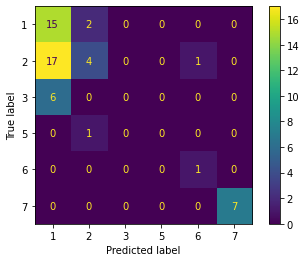

In [10]:
#plot confusion metrix

plot_confusion_matrix(nb, X_test,y_test)

---

## Multinomial Naive Bayes

**Aim :** Assuming a set of documents that need to be classified, use the naïve Bayesian Classifier model to perform this task.  Built-in Java classes/API can be used to write the program. Calculate the accuracy, precision, and recall for your data set.

---

### A. Steps to preprocess documents:

1. Document refers to Tweets in this program.
2. for getting word Vector first we import CountVectorizer.
3. Fit the training set in it and transform training set into word vector
4. Then transform test vector using same transformer

### B. Algorithm

Bayes’ theorem :



where, y is class variable and X is a dependent feature vector (of size n) where:


<br>

The parameters $\theta_y$ is estimated by a smoothed version of maximum likelihood, i.e. relative frequency counting:

$$
\hat{\theta}_{yi} = \frac{ N_{yi} + \alpha}{N_y + \alpha n}
$$


where $N_{yi} = \sum_{x \in T} x_i$ is the number of times feature $i$ appears in a sample of class $y$ in the training set $T$ and ,$N_{y} = \sum_{i=1}^{n} N_{yi}$ and is the total count of all features for class $y$.


Setting $\alpha = 1$ is called Laplace smoothing, while $\alpha < 1$  is called Lidstone smoothing.

### 1. Import all package and read Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score

In [2]:
df = pd.read_csv("data/train.csv")
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


### 2. Split data in train and test set

In [3]:
X = df["tweet"]
Y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X,Y)

### 3. Transform documents to word vector

In [4]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)  
X_test_vec = vectorizer.transform(X_test) 

In [5]:
X_train_vec

<3363x9275 sparse matrix of type '<class 'numpy.int64'>'
	with 40346 stored elements in Compressed Sparse Row format>

### 4. Train Multinomial Naive Bayes model

In [6]:
mnb = MultinomialNB()
mnb.fit(X = X_train_vec,y=y_train)

MultinomialNB()

### 5. Predict and Check Accuracy

In [7]:
y_pred = mnb.predict(X_test_vec)

Accuracy of Model  = 0.8822479928635147

Classification Report :
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       585
           1       0.84      0.93      0.88       536

    accuracy                           0.88      1121
   macro avg       0.89      0.88      0.88      1121
weighted avg       0.89      0.88      0.88      1121

Confusion Metrix: 


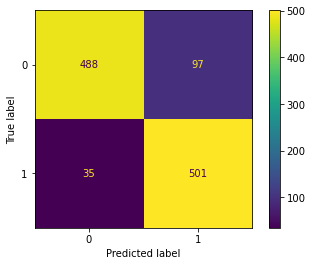

In [8]:
print(f'Accuracy of Model  = {accuracy_score(y_test,y_pred)}\n')

#print classification report
print("Classification Report :")
print(classification_report(y_test,y_pred))

#plot confusion metrix
print("Confusion Metrix: ")
plot_confusion_matrix(mnb,X_test_vec,y_test);

